In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib.collections import LineCollection
from matplotlib.collections import EventCollection


In [2]:
pwd

'/home/tomi/Tomi/repos/linear_regression_class'

# Anscombe

Para nuestra simple visualizasion vamos a usar el el 1er dataset del Cuarteto de Ambscombe

In [3]:
# Filtramos el dataSet I

anscombe = sns.load_dataset('anscombe')
anscombe_I = anscombe[anscombe['dataset']=='I']

In [4]:
anscombe_I

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


# Cálculo de Regresión Lineal (Anscombe)
### $\hat{y} = \beta + \alpha x$

In [23]:
ansc_x = anscombe_I['x']
ansc_y = anscombe_I['y']

X = np.array(ansc_x).reshape(-1,1)
y = np.array(ansc_y).reshape(-1,1)


# Calculo Regression 
regr = LinearRegression()
reg = regr.fit(X, y)

X_lr = np.linspace(3,15,15)
y_lr = reg.coef_[0] * X_lr + reg.intercept_[0]


print('Parametro alpha:',reg.coef_)
print('Parametro beta:',reg.intercept_)

Parametro alpha: [[0.50009091]]
Parametro beta: [3.00009091]


# Datos Crudos (sin entrenamiento)

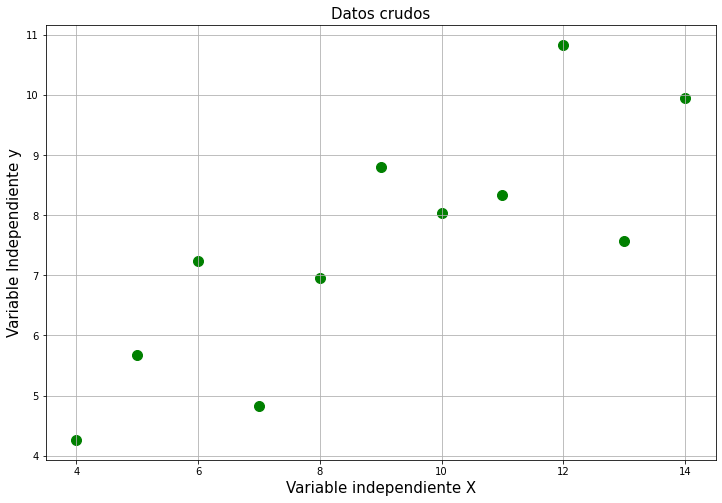

In [24]:
plt.figure(figsize=(12,8))
plt.scatter(ansc_x, ansc_y, color='green', s=100)

plt.title('Datos crudos', size=15)
plt.xlabel('Variable independiente X', size=15)
plt.ylabel('Variable Independiente y',size=15)
plt.grid()
plt.savefig('datos_crudos.png')
plt.show()

# Grafico Regresión


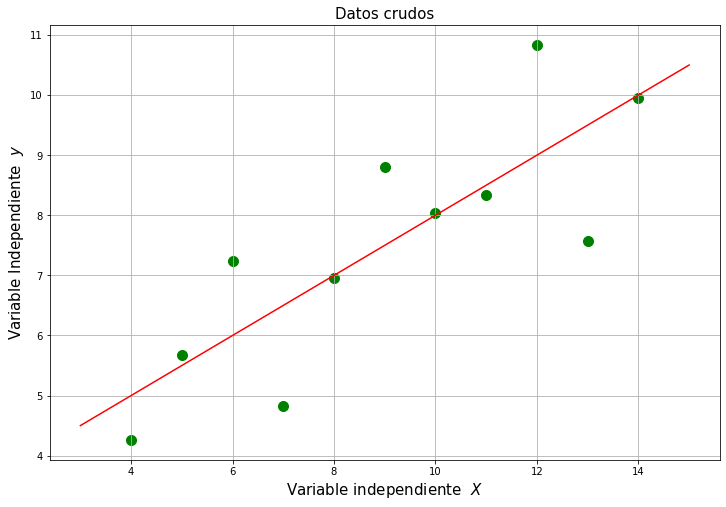

In [8]:
X = [[-1, 12], [1, 4], [5,5]]
Y = [[1, 10], [3, 2], [4,4]]
plt.figure(figsize=(12,8))
plt.scatter(ansc_x, ansc_y, color='green', s=100)
plt.plot(X_lr, y_lr, color='red')
#plt.plot(segmento_x, segmento_y)
#plt.scatter([ansc_x[0]], [reg.coef_[0] * ansc_x[0] + reg.intercept_[0]], color='red')

plt.title('Datos crudos', size=15)
plt.xlabel('Variable independiente  $X$', size=15)
plt.ylabel('Variable Independiente  $y$',size=15)

plt.grid()
plt.savefig('datos_fiteados.png')
plt.show()

# Propelati

In [9]:
data = pd.read_csv('/home/tomi/Tomi/laboDeDatos/data/ar_properties.csv')

In [10]:
# Agregamos el precio por m^2
data['precio_m2'] = data['price'] / data['surface_total']

In [11]:
data.describe()

,lat,lon,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,precio_m2
count,338294.000000,338294.000000,0.0,244223.000000,158144.000000,294755.000000,314828.000000,2.910370e+05,3.676690e+05,3.005210e+05
mean,-34.478337,-59.365459,NaN,2.898564,2.155713,1.669648,458.281439,2.350094e+02,2.689550e+05,inf
std,2.884273,2.722403,NaN,1.673284,2.728397,1.077957,3932.543286,1.250136e+04,4.757709e+06,NaN
min,-54.975338,-105.270546,NaN,1.000000,-2.000000,1.000000,-3.000000,-1.390000e+02,0.000000e+00,-3.666667e+04
25%,-34.666276,-58.800411,NaN,2.000000,1.000000,1.000000,50.000000,4.300000e+01,2.000000e+04,2.440945e+02
50%,-34.595263,-58.475339,NaN,3.000000,2.000000,1.000000,91.000000,7.000000e+01,9.400000e+04,1.075697e+03
75%,-34.432361,-58.395236,NaN,4.000000,3.000000,2.000000,266.000000,1.420000e+02,2.250000e+05,2.228571e+03
max,44.672794,-41.898741,NaN,40.000000,390.000000,20.000000,200000.000000,4.000000e+06,2.147484e+09,inf


In [12]:
# Filtramos los datos

data_filtrada = data[(data['surface_covered'] < 600) & (data['surface_total'] < 150) & (data['surface_total'] > 45)\
                     & (data['price'] < 500000) & (data['price'] > 1.000000e+05)\
                    & (data['l2'] == 'Capital Federal') & (data['operation_type'] == 'Venta') & (data['currency'] == 'USD')\
                    & (data['surface_covered'] > 20)& (data['rooms'] > 1) & (data['rooms'] < 6) \
                    & (data['precio_m2'] < 10000)& (data['l3'] == 'Flores')]    

In [14]:
data_filtrada.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,property_type,operation_type,precio_m2
512,2ONl7kHfo3NLMIlGRMxVfQ==,Propiedad,2019-04-14,2019-07-24,2019-04-14,-34.622440,-58.459943,Argentina,Capital Federal,Flores,...,2.0,83.0,58.0,209000.0,USD,NaN,2 dormitorios en Flores a estrenar piso alto,Departamento,Venta,2518.072289
1443,L5ErxaPL6Sqyz5H3MrQNcg==,Propiedad,2019-05-01,9999-12-31,2019-05-01,-34.621380,-58.460178,Argentina,Capital Federal,Flores,...,2.0,120.0,75.0,252000.0,USD,NaN,Av. Boyaca 400 1° - U$D 252.000 - Departamen...,Departamento,Venta,2100.000000
1650,17rhd4a0bOS3lDVR3yBOSA==,Propiedad,2019-05-01,2019-07-10,2019-05-01,-34.631623,-58.464742,Argentina,Capital Federal,Flores,...,1.0,48.0,45.0,109000.0,USD,Mensual,DEPARTAMENTO EN VENTA,Departamento,Venta,2270.833333
1791,JI7seemMdH8kbdWHBcevwQ==,Propiedad,2019-05-01,9999-12-31,2019-05-01,-34.625148,-58.466046,Argentina,Capital Federal,Flores,...,2.0,74.0,66.0,189000.0,USD,NaN,3 AMBIENTES A ESTRENAR CON BALCON EDIFICIO CON...,Departamento,Venta,2554.054054
2937,6u5pzhdPosUcY9q4fUQrbw==,Propiedad,2019-06-21,2019-07-16,2019-06-21,-34.637087,-58.459980,Argentina,Capital Federal,Flores,...,1.0,110.0,108.0,230000.0,USD,Mensual,Casa - Flores Sur,Casa,Venta,2090.909091


In [25]:
# Datos que realmente vamos a utilizar

data_imagen = data_filtrada[['surface_covered','price']]
data_imagen

,surface_covered,price
512,58.0,209000.0
1443,75.0,252000.0
1650,45.0,109000.0
1791,66.0,189000.0
2937,108.0,230000.0
...,...,...
388509,100.0,250000.0
388510,59.0,110000.0
388512,65.0,130000.0
388744,104.0,345000.0


# Cálculo de Regresión Lineal (Propelati)


In [27]:
X = np.array(data_filtrada['surface_covered']).reshape(-1,1)
y = np.array(data_filtrada['price']).reshape(-1,1)

regr = LinearRegression()
reg = regr.fit(X, y)

print('Parametro alpha:',reg.coef_)
print('Parametro beta:',reg.intercept_)

Parametro alpha: [[1755.39338971]]
Parametro beta: [48466.31879147]


In [18]:
# Genero la regresión

X_reg = np.linspace(0, 200, 1000)
y_reg = 1814.02764814 * X_reg + 44937.56079467

# Datos Propelati


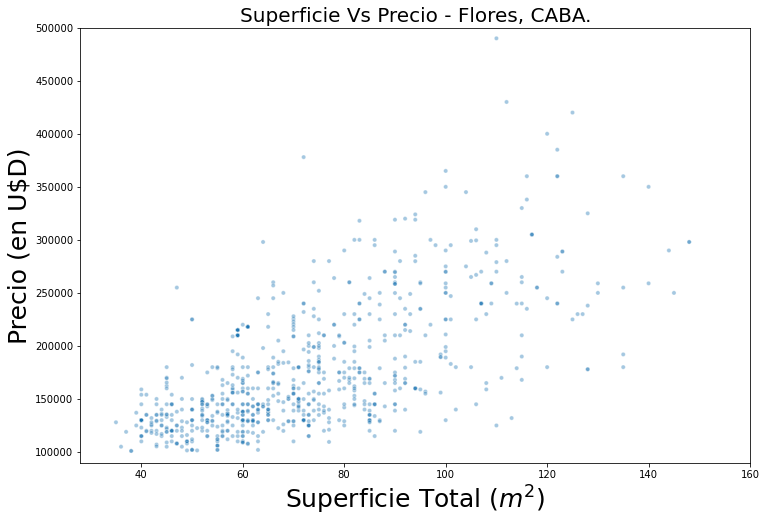

In [19]:

plt.figure(figsize=(12,8))

sns.scatterplot(data=data_filtrada, x="surface_covered", y="price", size=0.1, alpha=0.4, legend=False)

plt.ticklabel_format(style='plain', axis='both')
plt.title('Superficie Vs Precio - Flores, CABA.', size=20)
plt.xlabel('Superficie Total ($m^2$)', size=25)
plt.ylabel('Precio (en U$D)', size=25)
plt.ylim(90000, 500000)
plt.ylim(90000, 500000)
plt.xlim(28, 160)

plt.savefig('flores_propelati.png')

plt.show()

# Grafico Regresión


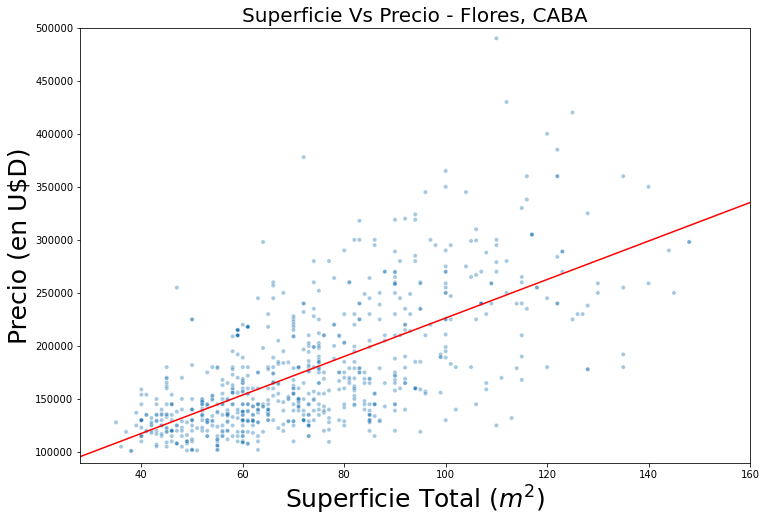

In [29]:


plt.figure(figsize=(12,8))

sns.scatterplot(data=data_filtrada, x="surface_covered", y="price", size=0.1, alpha=0.4, legend=False)
sns.lineplot(X_reg, y_reg, color='red')

plt.ticklabel_format(style='plain', axis='both')
plt.title('Superficie Vs Precio - Flores, CABA', size=20)
plt.xlabel('Superficie Total ($m^2$)', size=25)
plt.ylabel('Precio (en U$D)', size=25)
plt.ylim(90000, 500000)
plt.xlim(28, 160)

plt.savefig('flores_propelati_fiteado.png')

plt.show()